In [1]:
import cv2
# import matplotlib as plt
from matplotlib import pyplot as plt
import numpy as np
from IPython.display import clear_output

In [2]:
def advance_frames(ctr, target_ctr):
    for i in range (ctr, target_ctr):
        ret, frame = cap.read()
    return target_ctr

# Frame Grabber

In [3]:
######PARAMS######
#fps of the input video
fps=30
#start time for annotation (in seconds)
start_time_s= 60*2+23
#end time for annotation (in seconds)
end_time_s = 60*2+53
###ENDOF PARAMS###

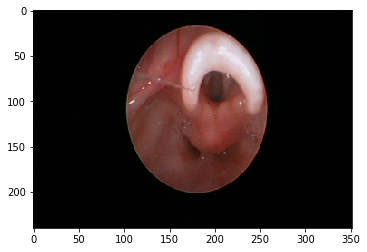

End!


In [10]:
cap = cv2.VideoCapture('/storage/vocal_cords_and_rings_data/data/videos/20181112_4m_5102019_1.mpg')
if not cap.isOpened(): print("ERROR! Unable to open video.")
    
ctr = 0

#Advance video to starting point
for i in range(0,start_time_s*fps):
    ret, frame = cap.read()
    ctr+=1

print("Starting.")
while(cap.isOpened() and ctr <end_time_s*fps):
    
    ret, frame = cap.read()
    ctr+=1
    print(ctr)

    if np.shape(frame) == (): #i.e. empty frame
        break
    
    
    #Skip frames
    key = input()
    key = int(key)
    ctr = advance_frames(ctr,ctr+1+10*key)
    
    
    clear_output()
    plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))
    plt.show()
    cv2.imwrite('/storage/vocal_cords_and_rings_data/data/captured/_img_{}.png'.format(ctr),frame)
    
cap.release()
print ("End!")

## Zip it!

In [ ]:
zip -r archive.zip captured

# Frame Labeller

In [4]:
import PIL
from fastai.vision import *
from fastai.callbacks.hooks import *
from fastai.utils.mem import *
from IPython.display import clear_output

In [5]:
path = Path('/storage')
path_img = path/'vocal_cords_and_rings_data/data/captured'
path_img = path_img.resolve()

images = get_image_files(path_img)
# images = images+get_image_files(path_img/'../captured1')

In [6]:
filtered_imgs = []
for i in images:
    if str(i).split('/')[-1][0]=='_':
        filtered_imgs.append(i)

In [7]:
filtered_imgs

[PosixPath('/storage/vocal_cords_and_rings_data/data/captured/_img_120.png'),
 PosixPath('/storage/vocal_cords_and_rings_data/data/captured/_img_4602.png'),
 PosixPath('/storage/vocal_cords_and_rings_data/data/captured/_img_12.png'),
 PosixPath('/storage/vocal_cords_and_rings_data/data/captured/_img_34.png'),
 PosixPath('/storage/vocal_cords_and_rings_data/data/captured/_img_56.png'),
 PosixPath('/storage/vocal_cords_and_rings_data/data/captured/_img_436.png'),
 PosixPath('/storage/vocal_cords_and_rings_data/data/captured/_img_370.png'),
 PosixPath('/storage/vocal_cords_and_rings_data/data/captured/_img_5302.png'),
 PosixPath('/storage/vocal_cords_and_rings_data/data/captured/_img_5100.png'),
 PosixPath('/storage/vocal_cords_and_rings_data/data/captured/_img_4634.png'),
 PosixPath('/storage/vocal_cords_and_rings_data/data/captured/_img_4334.png'),
 PosixPath('/storage/vocal_cords_and_rings_data/data/captured/_img_500.png'),
 PosixPath('/storage/vocal_cords_and_rings_data/data/captured/

In [11]:
! mkdir -p '/storage/vocal_cords_and_rings_data/data/classifier_1/0'
! mkdir -p '/storage/vocal_cords_and_rings_data/data/classifier_1/1'
! mkdir -p '/storage/vocal_cords_and_rings_data/data/classifier_1/2'
! mkdir -p '/storage/vocal_cords_and_rings_data/data/classifier_1/3'
! mkdir -p '/storage/vocal_cords_and_rings_data/data/classifier_1/4'

In [ ]:
# {1:'larynx',2:'transition_larynx_trachea',3:'trachea', 4:'bifurcation'}

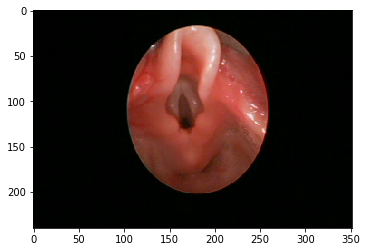

1


In [9]:
classifications = {0:[],1:[],2:[],3:[],4:[]}
for im_path in filtered_imgs:
    clear_output()
    i = PIL.Image.open(im_path)
    plt.imshow(i)
    plt.show()
    key = input()
    classifications[int(key)].append(str(im_path))
    i.save('/storage/vocal_cords_and_rings_data/data/classifier_1/{}/'.format(str(key))+str(im_path).split('/')[-1])
    

In [10]:
len(classifications[0]+classifications[1]+classifications[2]+classifications[3]+classifications[4])

27

In [ ]:
file = open("File_Name","Access_Mode")